In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

features, target = load_iris(return_X_y=True)

scaler = MinMaxScaler()
features_n = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_n, target)

In [30]:
model = tf.keras.models.Sequential()

# 2 hidden layer incl. input layer
model.add(tf.keras.layers.Dense(10, activation="relu", input_shape=(X_train.shape[1:])))
model.add(tf.keras.layers.Dense(10, activation="relu"))

# output layer
model.add(tf.keras.layers.Dense(3, activation="softmax"))

model.compile(optimizer="adam", metrics=['accuracy'], loss="sparse_categorical_crossentropy")

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

0.5526
Epoch 59/200
4/4 [==============================] - 0s 7ms/step - loss: 0.5310 - accuracy: 0.7143 - val_loss: 0.5902 - val_accuracy: 0.5526
Epoch 60/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5269 - accuracy: 0.7143 - val_loss: 0.5859 - val_accuracy: 0.5526
Epoch 61/200
4/4 [==============================] - 0s 9ms/step - loss: 0.5230 - accuracy: 0.7143 - val_loss: 0.5814 - val_accuracy: 0.5526
Epoch 62/200
4/4 [==============================] - 0s 6ms/step - loss: 0.5192 - accuracy: 0.7143 - val_loss: 0.5771 - val_accuracy: 0.5526
Epoch 63/200
4/4 [==============================] - 0s 7ms/step - loss: 0.5155 - accuracy: 0.7143 - val_loss: 0.5735 - val_accuracy: 0.5526
Epoch 64/200
4/4 [==============================] - 0s 7ms/step - loss: 0.5117 - accuracy: 0.7143 - val_loss: 0.5691 - val_accuracy: 0.5526
Epoch 65/200
4/4 [==============================] - 0s 7ms/step - loss: 0.5082 - accuracy: 0.7232 - val_loss: 0.5646 - val_accuracy: 0.5526
Epoch 66/200

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

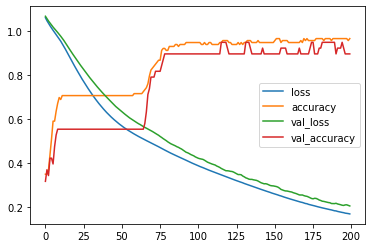

In [35]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [40]:
model.save("iris_model")

INFO:tensorflow:Assets written to: iris_model\assets


In [41]:
new_model = tf.keras.models.load_model("iris_model")

In [42]:
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
